# CS 4496/7496 Character Animation (Fall 2022)
Copyright (c) Georgia Institute of Technology

---


# Homework 1: Keyframe Interpolation (due 9/23/2022, 11:59PM)

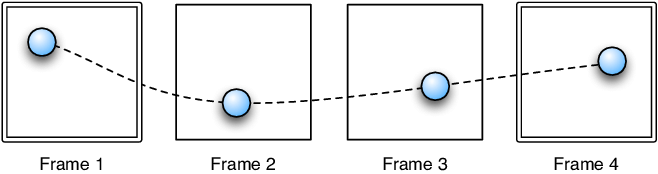

In this project, you will write code snippets to demonstrate three different types of interpolation - Bezier Curves, B-spline, and Catmull-Rom spline. Why are splines important? We can use those splines to describe various aspects of animation, including motions or geometry.



Let's start with the example of linear splines.
Our goal is to generate the linear interpolation of the predefined $2$D control points. The below contains three example keyframes out of a total of ten keyframes (points). X-axis values are uniformly set to [0, 1, ..., 9] for clarity, but they can be any value.

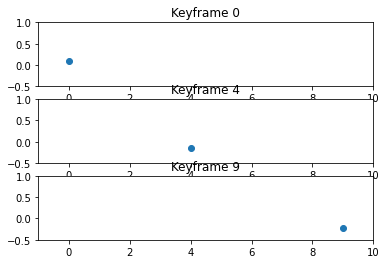

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# Data generation
num_dimensions = 2
num_points = 10
control_points = np.zeros((num_points, num_dimensions))
control_points[:, 0] = np.linspace(0.0, num_points - 1, num_points)  # X points = [0.0, 1.0, 2.0, ..., ]
control_points[:, 1] = [np.random.uniform(-1.0, 1.0) for i in range(num_points)]  # Y points are randomly sampled between (-1.0, 1.0)

# We want to visualize three key frames at [0, 4, 9]
frame_indices = [0, 4, 9]
fig, ax_array = plt.subplots(len(frame_indices), 1)
for ax_index, frame in enumerate(frame_indices):
  ax_array[ax_index].scatter(control_points[frame:frame + 1, 0], control_points[frame:frame + 1, 1])
  ax_array[ax_index].set_title('Keyframe %d' % frame)
  ax_array[ax_index].set_xlim(-1.0, 10.0);
  ax_array[ax_index].set_ylim(-0.5, 1.0);

For brevity, we will overlay all the figures into one figure.

(-1.0, 10.0)

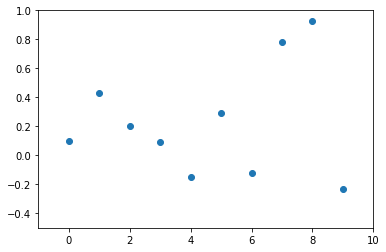

In [2]:
plt.scatter(control_points[:, 0], control_points[:, 1]); plt.ylim(-0.5, 1.0); plt.xlim(-1.0, 10.0)

Without any interpolation, the coarse "animation" of the keyframes (if you can call it an animation) looks like this:

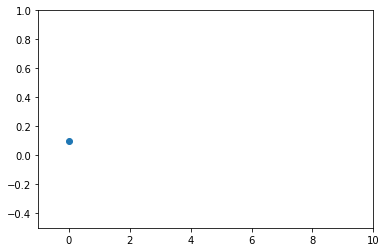

In [3]:
from matplotlib import rc
rc('animation', html='jshtml')

from math import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

fig = plt.figure()
ax = plt.axes()

def control_points_frame(w):
    ax.clear()
    plot = ax.scatter(control_points[w][0], control_points[w][1])
    ax.set_xlim(-1.0, 10.0)
    ax.set_ylim(-0.5, 1.0)
    return plot

anim = animation.FuncAnimation(fig, control_points_frame, frames=10, blit=False, repeat=True)
anim

## The below is a helper function for unit tests. Do not modify this.



In [4]:
# Unit test
def unit_test_fn(func):
    def check_segment_interpolation_sample_points(ans):
        _control_points_test = np.zeros((4,2))
        _control_points_test[:, 0] = np.linspace(0.0, 3.0, 4)
        _control_points_test[:, 1] = [0.9819, 0.2035, 0.5105, 0.2076]
        _sample_t = [0.00, 0.02, 0.18, 0.25, 0.29, 0.36, 0.42, 0.49, 0.50, 0.56, 0.60, 0.63, 0.67, 0.70, 0.77, 0.84, 0.89, 0.91, 0.98, 1.00]
        arg_list = [_control_points_test[i] for i in range(_control_points_test.shape[0])]
        result_list = [func(*arg_list, t) for t in _sample_t]
        for index, result in enumerate(result_list):
            assert isinstance(result, np.ndarray), "Return type of function {} is incorrect. Receieved {}, expected np.ndarray. Arguments: {}".format(func.__name__, type(result), arg_list[index])
            assert result.shape == (2,), "Return shape of function {} is incorrect. Received {}, expected (2,). Arguments: {}".format(func.__name__, result.shape, arg_list[index])
        result_nparray = np.array(result_list)
        assert np.allclose(ans, result_nparray, 1e-6), "Return value of function {} is incorrect. \nReceived: \n{}\n\n Expected: \n{}.".format(func.__name__, result_nparray, ans)
    def check_interpolation_of_points(ans_shape, sample_indices, sample_ans):
        _control_points_test = np.array([
            [ 0. , -0.51064943], [ 1. , -0.74309808], [ 2. ,  0.92653032],
            [ 3. ,  0.12638864], [ 4. ,  0.49657578], [ 5. , -0.31292725],
            [ 6. , -0.47351536], [ 7. , -0.30774717], [ 8. ,  0.92802376],
            [ 9. ,  0.5762698 ]])
        result = func(_control_points_test)
        assert isinstance(result, np.ndarray), "Return type of function {} is incorrect. Receieved {}, expected np.ndarray. Arguments: {}".format(func.__name__, type(result), _control_points_test)
        assert result.shape == ans_shape, "Return shape of function {} is incorrect. Received {}, expected {}. Arguments: {}".format(func.__name__, result.shape, ans_shape, _control_points_test)
        sampled_results = result.take(sample_indices, axis=0)
        assert np.allclose(sample_ans, sampled_results, 1e-6), "Return value of function {} is incorrect.".format(func.__name__)

    if func.__name__ == 'bezier_segment_interpolation_at_t':
        ans = np.array([
            [ 0.   , 0.9819     ], [ 0.06 , 0.93648492 ], [ 0.54 , 0.65717789 ],
            [ 0.75 , 0.57512344 ], [ 0.87 , 0.53719175 ], [ 1.08 , 0.4841356  ],
            [ 1.26 , 0.44990829 ], [ 1.47 , 0.42001527 ], [ 1.5  , 0.4164375  ],
            [ 1.68 , 0.39761052 ], [ 1.8  , 0.3868272  ], [ 1.89 , 0.3792051  ],
            [ 2.01 , 0.36914067 ], [ 2.1  , 0.3613101  ], [ 2.31 , 0.34043659 ],
            [ 2.52 , 0.31309563 ], [ 2.67 , 0.28767407 ], [ 2.73 , 0.2757983  ],
            [ 2.94 , 0.22505568 ], [ 3.   , 0.2076     ]])
        check_segment_interpolation_sample_points(ans)
    elif func.__name__ == 'bspline_segment_interpolation_at_t':
        ans = np.array([
            [ 1.   , 0.3844     ], [ 1.02 , 0.37990082 ], [ 1.18 , 0.35790965 ],
            [ 1.25 , 0.35497891 ], [ 1.29 , 0.35479696 ], [ 1.36 , 0.35669927 ],
            [ 1.42 , 0.36020472 ], [ 1.49 , 0.36596755 ], [ 1.5  , 0.36690625 ],
            [ 1.56 , 0.37297842 ], [ 1.6  , 0.3773212  ], [ 1.63 , 0.38065585 ],
            [ 1.67 , 0.38511844 ], [ 1.7  , 0.38841835 ], [ 1.77 , 0.39568443 ],
            [ 1.84 , 0.4018726  ], [ 1.89 , 0.40531068 ], [ 1.91 , 0.40640138 ],
            [ 1.98 , 0.40868928 ], [ 2.   , 0.40885    ]])
        check_segment_interpolation_sample_points(ans)
    elif func.__name__ == 'catmullrom_segment_interpolation_at_t':
        ans = np.array([
            [ 1.   , 0.2035     ], [ 1.02 , 0.19933536 ], [ 1.18 , 0.20117785 ],
            [ 1.25 , 0.21822734 ], [ 1.29 , 0.2314021  ], [ 1.36 , 0.2592894  ],
            [ 1.42 , 0.28696305 ], [ 1.49 , 0.32210486 ], [ 1.5  , 0.32728125 ],
            [ 1.56 , 0.35866086 ], [ 1.6  , 0.3795136  ], [ 1.63 , 0.39488658 ],
            [ 1.67 , 0.41476736 ], [ 1.7  , 0.42903755 ], [ 1.77 , 0.45936932 ],
            [ 1.84 , 0.48413741 ], [ 1.89 , 0.49745626 ], [ 1.91 , 0.50159738 ],
            [ 1.98 , 0.51000474 ], [ 2.   , 0.5105     ]])
        check_segment_interpolation_sample_points(ans)
    elif func.__name__ == 'bezier_interpolation_of_points':
        ans_shape = (303, 2)
        sample_indices = np.array([2, 5, 14, 23, 45, 46, 52, 53, 114, 130, 138,
                                   152, 167, 177, 190, 203, 212, 237, 246, 290])
        sample_ans = np.array([
            [ 0.06 , -0.52234883 ], [ 0.15 , -0.53179763 ], [ 0.42 , -0.50843208 ],
            [ 0.69 , -0.42237163 ], [ 1.35 , -0.06732787 ], [ 1.38 , -0.04952817 ],
            [ 1.56 ,  0.0549789  ], [ 1.59 ,  0.07177006 ], [ 3.39 ,  0.21496878 ],
            [ 3.87 ,  0.19541347 ], [ 4.11 ,  0.14542195 ], [ 4.53 ,  0.01482902 ],
            [ 4.98 , -0.15654329 ], [ 5.28 , -0.27103806 ], [ 5.67 , -0.39939955 ],
            [ 6.03 , -0.46822397 ], [ 6.3  , -0.39434235 ], [ 7.05 , -0.02017425 ],
            [ 7.32 ,  0.14037741 ], [ 8.64 ,  0.63891236 ]])
        check_interpolation_of_points(ans_shape, sample_indices, sample_ans)
    elif func.__name__ == 'bspline_interpolation_of_points':
        ans_shape = (707, 2)
        sample_indices = np.array([24, 39, 44, 93, 163, 192, 211, 246, 384, 410,
                                   413, 450, 453, 480, 514, 529, 561, 600, 609,
                                   663])
        sample_ans = np.array([
            [ 1.24 , -0.20891659 ], [ 1.39 , -0.04440449 ], [ 1.44 ,  0.01214679 ],
            [ 1.93 ,  0.47866893 ], [ 2.62 ,  0.45434263 ], [ 2.91 ,  0.34508896 ],
            [ 3.09 ,  0.30654979 ], [ 3.44 ,  0.30677727 ], [ 4.81 , -0.10299359 ],
            [ 5.06 , -0.23272106 ], [ 5.09 , -0.24583995 ], [ 5.46 , -0.36447329 ],
            [ 5.49 , -0.37086964 ], [ 5.76 , -0.40960202 ], [ 6.09 , -0.41747744 ],
            [ 6.24 , -0.40738861 ], [ 6.56 , -0.34473352 ], [ 6.95 , -0.16312985 ],
            [ 7.03 , -0.10792075 ], [ 7.57 ,  0.3618213  ]])
        check_interpolation_of_points(ans_shape, sample_indices, sample_ans)
    elif func.__name__ == 'catmullrom_interpolation_of_points':
        ans_shape = (707, 2)
        sample_indices = np.array([33, 50, 58, 60, 71, 117, 139, 146, 152, 194,
                                   287, 288, 317, 373, 378, 448, 454, 465, 554,
                                   583])
        sample_ans = np.array([
            [ 1.33 , -0.24290378 ], [ 1.5  ,  0.12719693 ], [ 1.58 ,  0.30245818 ],
            [ 1.6  ,  0.34520271 ], [ 1.71 ,  0.56607723 ], [ 2.16 ,  0.92533786 ],
            [ 2.38 ,  0.75047001 ], [ 2.45 ,  0.6693926  ], [ 2.51 ,  0.59509235 ],
            [ 2.93 ,  0.15259832 ], [ 3.85 ,  0.4937809  ], [ 3.86 ,  0.49596097 ],
            [ 4.14 ,  0.43885122 ], [ 4.7  , -0.08061135 ], [ 4.75 , -0.12852933 ],
            [ 5.44 , -0.44604708 ], [ 5.5  , -0.45417576 ], [ 5.61 , -0.46466973 ],
            [ 6.49 , -0.47859729 ], [ 6.78 , -0.42198534 ]])
        check_interpolation_of_points(ans_shape, sample_indices, sample_ans)
    elif func.__name__ == 'bspline_interpolation_of_points_v2':
        ans_shape = (1111, 2)
        sample_indices = np.array([18, 80, 107, 233, 256, 392, 440, 522, 602,
                                   623, 711, 786, 812, 831, 898, 921, 1010,
                                   1063, 1064, 1078])
        sample_ans = np.array([
            [ 0.000972   , -0.51087537 ], [ 0.08533333 , -0.53048505 ], [ 0.19843067 , -0.5567059  ],
            [ 1.31       , -0.13363452 ], [ 1.54       ,  0.12454137 ], [ 2.89       ,  0.35136394 ],
            [ 3.36       ,  0.30161519 ], [ 4.17       ,  0.2470697  ], [ 4.97       , -0.18993961 ],
            [ 5.17       , -0.27811981 ], [ 6.04       , -0.41875002 ], [ 6.79       , -0.25412925 ],
            [ 7.04       , -0.10055494 ], [ 7.23       ,  0.05467617 ], [ 7.9        ,  0.61174073 ],
            [ 8.119712   ,  0.70560563 ], [ 8.83333333 ,  0.63489546 ], [ 8.98269617 ,  0.58235649 ],
            [ 8.98377733 ,  0.58197619 ], [ 8.99453867 ,  0.57819085 ]])
        check_interpolation_of_points(ans_shape, sample_indices, sample_ans)
    elif func.__name__ == 'c2_interpolation_of_points':
        ans_shape = (909, 2)
        sample_indices = np.array([24, 116, 168, 210, 308, 338, 388, 399, 404,
                                   464, 496, 500, 551, 554, 586, 591, 645, 703,
                                   769, 895])
        sample_ans = np.array([
            [ 0.24 , -0.72849163 ], [ 1.15 , -0.52032395 ], [ 1.67 ,  0.52076981 ],
            [ 2.08 ,  0.94552347 ], [ 3.05 ,  0.10999305 ], [ 3.35 ,  0.17154292 ],
            [ 3.85 ,  0.47104838 ], [ 3.96 ,  0.49592613 ], [ 4.   ,  0.49657578 ],
            [ 4.6  ,  0.06896775 ], [ 4.92 , -0.25078027 ], [ 4.96 , -0.28324288 ],
            [ 5.46 , -0.47299635 ], [ 5.49 , -0.47512381 ], [ 5.81 , -0.47334069 ],
            [ 5.86 , -0.47218835 ], [ 6.39 , -0.50750425 ], [ 6.97 , -0.33361492 ],
            [ 7.62 ,  0.51367268 ], [ 8.87 ,  0.68610613 ]])
        #print(sample_ans)
        check_interpolation_of_points(ans_shape, sample_indices, sample_ans)
    else:
        assert False, "Invalid function or misnamed function passed into unit_test_fn. Received name: {}".format(func.__name__)
    print("√ Unit test passed for {}. :D".format(func.__name__))


# Example: Linear Interpolation

The most intuitive approach is linear interpolation. The below example function returns a point that linearly interpolates two points, p0 and p1, at time t. The time t is assumed to be between 0 and 1.

In [5]:
def linear_segment_interpolation_at_t(p0, p1, t):
  """
  Returns the linear interpolation of two points at time t.

  Args:
    p0: the point at t = 0 (np.array).
    p1: the point at t = 1 (np.array).
    t: the given time for interpolation.
  """
  assert 0 <= t <= 1  # what if we do not have this assertion?
  return (1 - t) * p0 + t * p1

Then we can write a complete linear interpolation function on top of the helper function (linear_interpolation_at_t). For each adjacent pair of control points, we will sample the in-between points by repetitively calling the interpolation function with t = 0.0, t = 0.01, t = 0.02, and so on. 

In [6]:
def linear_interpolation_of_points(control_points):
  """
  Returns the linear interpolation of control points.

  Args:
    control_points: a list of points (np.array) that defines a spline.
  """
  interpolated_points = list()  # The container for interpolated points
  time_array = np.linspace(0.0, 1.0, 101)  # time[0] = 0.0, time[1] = 0.01, ... time[100] = 1.0

  # For each pair of control points
  for p0, p1 in zip(control_points[:-1], control_points[1:]):
    # Compute the interpolated points and append to the list
    points = [linear_segment_interpolation_at_t(p0, p1, t) for t in time_array]
    interpolated_points += points
  
  return np.array(interpolated_points)

Let's verify the results by visualizing the spline and control points. Can you see the black lines that interpolate blue control points? If not, please contact instructors.

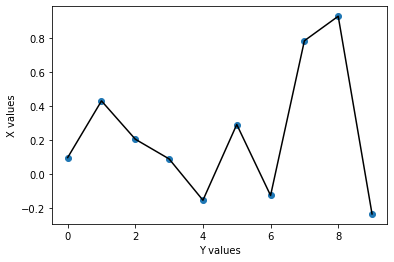

In [7]:
linear_points = linear_interpolation_of_points(control_points)
plt.plot(linear_points[:, 0], linear_points[:, 1], 'k')
plt.scatter(control_points[:, 0], control_points[:, 1])
plt.ylabel('X values'); plt.xlabel('Y values');

# 1. Bezier Curves
Alright. It is time to write your own code to generate Bezier curves. The first step is to write an interpolation helper function below. (hint: start with constructing the time matrix T, the basis matrix M, and the geometry matrix G).

** **Note from the instructor: please document the code as much as possible, just in case** **

**<font color='orange'> \*\*Write your code below (15 pts)\*\* </font>**

In [8]:
def bezier_segment_interpolation_at_t(p0, p1, p2, p3, t):
  """Interpolate using a bezier curve at a given time t, with the the four provided control points.
  
  Args:
    p0 - p3: The positions of the control points. Each is a np.array of shape (2,).
    t: The given time for interpolation. (0 <= t <= 1)
  Returns:
    The interpolated position at t as a np.array of shape (2,)
  """
  # Student answer begins
  G = np.array([p0, p1, p2, p3])
  M = np.array([[-1, 3, -3, 1], [3, -6, 3, 0], [-3, 3, 0, 0], [1, 0, 0, 0]])
  T = np.array([t**3, t**2, t, 1])
  return np.dot(np.matmul(T, M), G)
  #print(G, M, T)
  # Student answer ends

Let's test to see if the interpolation is correct.

In [9]:
unit_test_fn(bezier_segment_interpolation_at_t)

√ Unit test passed for bezier_segment_interpolation_at_t. :D


The `bezier_segment_interpolation_at_t` you implemented is good for interpolation between 4 control points. However, to generate an animation for all control points, we need to create a spline. To do so, we will create multiple Bezier curves by grouping four points together, like `[(0, 1, 2, 3), (3, 4, 5, 6)]`, and so on (hint: will these curves meet at endpoints?). So carefully manipulate the indices in the loop.

For the following function, you will be given a series of control points. You will need to interpolate between them. For each bezier curve within your spline, i.e. a segment with 4 control points, you will need to generate 101 sample points at `t = [0.00, 0.01, ..., 1.00]`. (For simplicity, we will have duplicated points at endpoints.) (Tip: you can use `np.linspace`, see `linear_interpolation_of_points` for an example of how to use it) Then, you will push all these sample points into a list, and **return the list as a `np.array`**. To convert a python list to a numpy array, simply do `np.array(list)`.

Pseudocode for what you need to do:

```
interpolated_points = []
For control_points_indices in [(0, 1, 2, 3), (3, 4, 5, 6), ...]:
  p0, p1, p2, p3 = control points with indices control_points_indices
  For time in [0.00, 0.01, 0.02, ..., 1.00]:
    push bezier_interpolation_at_t(p0, p1, p2, p3, time) into interpolated_points
Return interpolated_points
```
(Another tip: you can refer to the function `linear_interpolation_of_points`.)

**<font color='orange'> \*\*Write your code below (15 pts)\*\* </font>**

In [10]:
def bezier_interpolation_of_points(control_points):
  """Sample a series of points using provided control points with bezier curves.
  Every four control points (with overlap of 1) in control_points will be used to
  create one bezier curve. Each bezier curve should generate 101 sample points
  that are equally spaced time-wise. 
  
  Args:
    control_points: The positions of the control points. Shape is (len(control_points), 2)
  Returns:
    The interpolated points as a numpy array. The shape should be (101 * (len(control_points) - 1) / 3, 2)
  """
  # Student answer begins
  interpolated_points = []
  time_array = np.linspace(0.0, 1.0, 101)
  #print(len(control_points))
  index = 0
  for p0, p1, p2, p3 in zip(control_points[:-3], control_points[1:-2], control_points[2:-1], control_points[3:]):
    #print(p0, p1)
    if (index % 3 == 0):
      points = [bezier_segment_interpolation_at_t(p0, p1, p2, p3, t) for t in time_array]
      interpolated_points += points
    index += 1
    #print(len(interpolated_points))
  #print(np.array(interpolated_points).shape)
  return np.array(interpolated_points)
  # Student answer ends

Since there are 10 control points, we will have 3 segments (`[(0, 1, 2, 3), (3, 4, 5, 6), (6, 7, 8, 9)]`). For each segment, we will generate 101 samples points. Therefore there should be 3 * 101 = 303 points in the returned list. Each point is a coordinate in the plane. Therefore, the shape of the returned array should be (303, 3). Let's do a quick sanity check to see if the return type and shape is correct. We will also do a unit test of your function.

In [11]:
bezier_points = bezier_interpolation_of_points(control_points)
assert isinstance(bezier_points, np.ndarray), 'bezier_points should be numpy array'
assert bezier_points.shape == (303, 2), 'berizer_points has incorrect shape'
unit_test_fn(bezier_interpolation_of_points)

√ Unit test passed for bezier_interpolation_of_points. :D


Once you wrote the interpolation function, the visualization is straightforward.

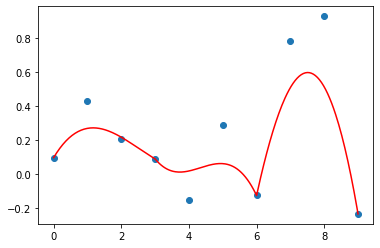

In [12]:
plt.plot(bezier_points[:, 0], bezier_points[:, 1], 'r')
plt.scatter(control_points[:, 0], control_points[:, 1])

# 2. B-Splines
The next is B-spline, which is defined by de Boor points. You can find its definition in the lecture slides. Once again, we will start with writing function `bspline_segment_interpolation_at_t`, which can be used to interpolate between t=0 and t=1.

Then, we will implement `bspline_interpolation_of_points`, which will piece together multiple B-Spline segements into one spline that uses all control points. Note that the indices of de Boor points must increase by one, not three. i.e. the grouping should be: `[(0, 1, 2, 3), (1, 2, 3, 4), ...]`. Again, we want 101 samples per segment.

**<font color='orange'> \*\*Write your code below (20 pts)\*\* </font>**

In [13]:
def bspline_segment_interpolation_at_t(p0, p1, p2, p3, t):
  """Interpolate using a segment of bspline at a given time t, with the the four
  provided control points (de Boor points).
  
  Args:
    p0 - p3: The positions of the control points. Each is a np.array of shape (2,).
    t: The given time for interpolation. (0 <= t <= 1)
  Returns:
    The interpolated position at t as a np.array of shape (2,)
  """
  # Student answer begins
  T = np.array([t**3, t**2, t, 1])
  M = np.multiply(1/6,np.array([[-1, 3, -3, 1], [3, -6, 3, 0], [-3, 0, 3, 0], [1, 4, 1, 0]]))
  B = np.array([p0, p1, p2, p3])
  return np.matmul(T, np.matmul(M, B))
  # Student answer ends

def bspline_interpolation_of_points(control_points):
  """Sample a series of points using provided control points with bsplines.
  Every four control points (with overlap of 3) in control_points will be used to
  create one bspline segment. Each segment should generate 101 sample points
  that are equally spaced time-wise. 
  
  Args:
    control_points: The positions of the control points. Shape is (len(control_points), 2)
  Returns:
    The interpolated points as a numpy array. The shape should be (101 * (len(control_points) - 3), 2)
  """
  # Student answer begins  
  interpolated_points = []
  time_array = np.linspace(0.0, 1.0, 101)
  for p0, p1, p2, p3 in zip(control_points[:-3], control_points[1:-2], control_points[2:-1], control_points[3:]):
    points = [bspline_segment_interpolation_at_t(p0, p1, p2, p3, t) for t in time_array]
    interpolated_points += points
  return np.array(interpolated_points)
  # Student answer ends  

Since there are 10 control points, the final spline will be made up from 7 segments. Because each segment has 101 sample points and each sample point represents a 2D coordinate, the shape of the output should be (707, 2). We will do a quick sanity check followed by a unit test.

In [14]:
# Test the implementation of bspline_segment_interpolation_at_t
unit_test_fn(bspline_segment_interpolation_at_t)

# Test the implementation of bspline_interpolation_of_points
bspline_points = bspline_interpolation_of_points(control_points)
assert isinstance(bspline_points, np.ndarray), "bspline_points should be numpy array"
assert bspline_points.shape != (1111, 2), "You shouldn't make the start point and the end point at de Boor point for this question. However, you will need to implement it for the extra question if you choose to do so."
assert bspline_points.shape == (707, 2), 'bspline_points has incorrect shape'
unit_test_fn(bspline_interpolation_of_points)

√ Unit test passed for bspline_segment_interpolation_at_t. :D
√ Unit test passed for bspline_interpolation_of_points. :D


Then the visualization is straight-forward.

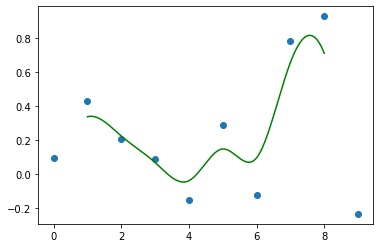

In [15]:
plt.plot(bspline_points[:, 0], bspline_points[:, 1], 'g')
plt.scatter(control_points[:, 0], control_points[:, 1])

# 3. Catmull-Rom spline
The final is a Catmull-Rom spline. As always, we will implement both the segment interpolation function and full interpolation functions. Similar to B-Spline, control point indices will increase one by one. Again, we want 101 sample points per segment.

**<font color='orange'> \*\*Write your code below (30 pts)\*\* </font>**

In [16]:
def catmullrom_segment_interpolation_at_t(p0, p1, p2, p3, t):
  """Interpolate using a segment of Catmull-Rom spline at a given time t, with
  the the four provided control points.
  
  Args:
    p0 - p3: The positions of the control points. Each is a np.array of shape (2,).
    t: The given time for interpolation. (0 <= t <= 1)
  Returns:
    The interpolated position at t as a np.array of shape (2,)
  """
  # Student answer begins  
  T = np.array([t**3, t**2, t, 1])
  M = np.multiply(1/2,np.array([[-1, 3, -3, 1], [2, -5, 4, -1], [-1, 0, 1, 0], [0, 2, 0, 0]]))
  B = np.array([p0, p1, p2, p3])
  return np.matmul(T, np.matmul(M, B))
  # Student answer ends

def catmullrom_interpolation_of_points(control_points):
  """Sample a series of points using provided control points with Catmull-Rom spline.
  Every four control points (with overlap of 3) in control_points will be used to
  create one Catmull-Rom spline segment. Each segment should generate 101 sample
  points that are equally spaced time-wise. 
  
  Args:
    control_points: The positions of the control points. Shape is (len(control_points), 2)
  Returns:
    The interpolated points as a numpy array. The shape should be (101 * (len(control_points) - 3), 2)
  """
  # Student answer begins  
  interpolated_points = []
  time_array = np.linspace(0.0, 1.0, 101)
  for p0, p1, p2, p3 in zip(control_points[:-3], control_points[1:-2], control_points[2:-1], control_points[3:]):
    points = [catmullrom_segment_interpolation_at_t(p0, p1, p2, p3, t) for t in time_array]
    interpolated_points += points
  return np.array(interpolated_points)
  # Student answer ends  

Since there are 10 control points, the final spline will be made up from 7 segments. Because each segment has 101 sample points and each sample point represents a 2D coordinate, the shape of the output should be (707, 2). We will do a quick sanity check followed by a unit test.

In [17]:
# Test the implementation of catmullrom_segment_interpolation_at_t
unit_test_fn(catmullrom_segment_interpolation_at_t)

# Test the implementation of catmullrom_interpolation_of_points
catmullrom_points = catmullrom_interpolation_of_points(control_points)
assert isinstance(catmullrom_points, np.ndarray), "catmullrom_points should be numpy array"
assert catmullrom_points.shape != (909, 2), "You don't need to make the spline go through the first and the last points for this question."
assert catmullrom_points.shape == (707, 2), 'catmullrom_points has incorrect shape'
unit_test_fn(catmullrom_interpolation_of_points)

√ Unit test passed for catmullrom_segment_interpolation_at_t. :D
√ Unit test passed for catmullrom_interpolation_of_points. :D


Let's repeat the same procedure for visualization.

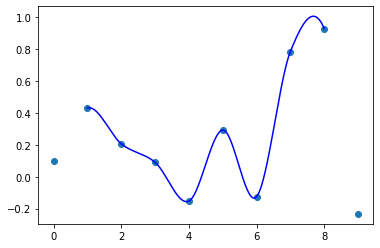

In [18]:
plt.plot(catmullrom_points[:, 0], catmullrom_points[:, 1], 'b')
plt.scatter(control_points[:, 0], control_points[:, 1])

Based on your observation, discuss the three properties (continuity, interpolation, and local control) of Bezier curves.

# 4. Discussion
Now let's take a look at all the results in one plot. We can simply plot everything all together.

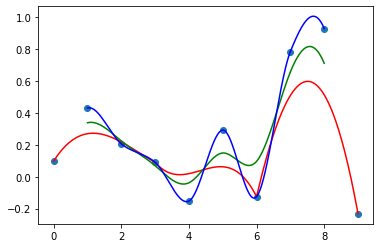

In [19]:
plt.plot(bezier_points[:, 0], bezier_points[:, 1], 'r')
plt.plot(bspline_points[:, 0], bspline_points[:, 1], 'g')
plt.plot(catmullrom_points[:, 0], catmullrom_points[:, 1], 'b')
plt.scatter(control_points[:, 0], control_points[:, 1])

We will also animate them.

generating the frame 0
generating the frame 0
generating the frame 10
generating the frame 20
generating the frame 30
generating the frame 40


generating the frame 0


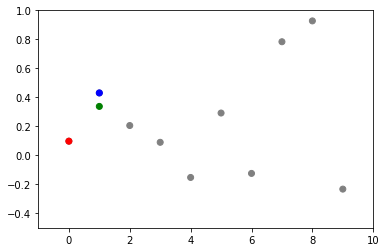

In [20]:
fig = plt.figure()
ax = plt.axes()
num_frames = 50

def frame(w):
    if w % 10 == 0:
      print('generating the frame %d' % w)
    ax.clear()
    global num_frames
    global bezier_points
    global bspline_points
    global control_points
    global catmullrom_points
    bezier_index = len(bezier_points) // num_frames * w
    bspline_index = len(bspline_points) // num_frames * w
    catmullrom_index = len(catmullrom_points) // num_frames * w
    x = [bezier_points[bezier_index, 0], bspline_points[bspline_index, 0], catmullrom_points[catmullrom_index, 0]]
    y = [bezier_points[bezier_index, 1], bspline_points[bspline_index, 1], catmullrom_points[catmullrom_index, 1]]
    x = list(control_points[:, 0]) + x
    y = list(control_points[:, 1]) + y
    c = ['grey'] * control_points.shape[0] + ['r', 'g', 'b'] 
    plot = ax.scatter(x, y, c=c)
    ax.set_xlim(-1.0, 10.0)
    ax.set_ylim(-0.5, 1.0)
    return plot

anim = animation.FuncAnimation(fig, frame, frames=num_frames, blit=False, repeat=True)
anim

Can you see all three splines and their animations? If so, please fill out the following properties table by writing **YES** or **NO** in corresponding cells. 
**<font color='orange'> \*\*Fill the table below (10 pts)\*\* </font>**


<!-- If your screen is too narrow to display the table below, you can make the table yourself and upload the table as a picture. -->

|              Spline | C0 Continuity | C1 Continuity | C2 Continuity | Interpolation | Local Control |
| ------------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
|       Bezier Curves | Yes | Yes | Yes | No | No |
|           B-Splines | Yes | Yes | Yes | No | Yes |
| Catmull-Rom Splines | Yes | Yes | No | Yes | Yes |

## 5. (Advanced) Interpolating the beginning and ending points of b-Splines.
Although b-splines do not have the interpolation properties by definition, it would be better to interpolate at least the first and last points. Please make a b-spline start and end at the first and last de Boor points. And visualize the results at the end. 

**<font color='orange'> \*\*Write your code below (10 pts)\*\* </font>**

In [21]:
def bspline_interpolation_of_points_v2(control_points):
  """Similar to bspline_interpolation_of_points, but the spline should go through
  the first and the last control points.
  
  Args:
    control_points: The positions of the control points. Shape is (len(control_points), 2)
  Returns:
    The interpolated points as a numpy array. The shape should be (101 * (len(control_points) + 1), 2)
  """
  interpolated_points = []
  time_array = np.linspace(0.0, 1.0, 101)
  #print(len(control_points))
  index = 0
  #print(control_points.shape)
  #p = np.array([-.5, 0])
  #p4 = np.array([9.5, 0])
  p = control_points[0]
  p4 = control_points[len(control_points)-1]
  control_points = np.append(control_points, p4)
  control_points = np.append(control_points, p4)
  control_points = np.insert(control_points, 0, p)
  control_points = np.insert(control_points, 0, p)
  control_points = control_points.reshape(14, 2)
  #print(control_points.shape)
  for p0, p1, p2, p3 in zip(control_points[:-3], control_points[1:-2], control_points[2:-1], control_points[3:]):
    #print(p0, p1)
    #if (index % 2 == 0):
    points = [bspline_segment_interpolation_at_t(p0, p1, p2, p3, t) for t in time_array]
      #print(points)
    interpolated_points += points
    index += 1
    #print(len(interpolated_points))
  #print(np.array(interpolated_points))
  return np.array(interpolated_points)

We provide a unit test for you.

In [22]:
unit_test_fn(bspline_interpolation_of_points_v2)

√ Unit test passed for bspline_interpolation_of_points_v2. :D


# 6. Extra Questions





## 6.1. Basis independence

One nice property of cubic interpolation is that they are "independent of the basis." That is, if the control points are transformed to another basis via a linear transformation, generate a spline, and transform the generated spline back to the original basis, the generated spline will be the same as the original spline.

To demonstrate it, we will use the Catmull-Rom spline as an example:

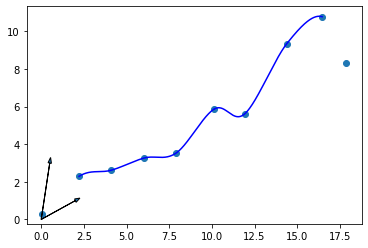

In [23]:
transform_matrix = np.array([
    [2, 1],
    [0.5, 3]]) # This will work as long as transform_matrix is invertible.
transformed_control_points = control_points.dot(transform_matrix)
transformed_catmullrom_points = catmullrom_interpolation_of_points(transformed_control_points)

# Let's do a quick visualization
plt.plot(transformed_catmullrom_points[:, 0], transformed_catmullrom_points[:, 1], 'b')
plt.scatter(transformed_control_points[:, 0], transformed_control_points[:, 1])
original_basis = np.array([[1, 0], [0, 1]])
transformed_basis = original_basis.dot(transform_matrix)
plt.arrow(0, 0, *transformed_basis[0], head_width=0.2) # Draw [1, 0] after transformation
plt.arrow(0, 0, *transformed_basis[1], head_width=0.2) # Draw [0, 1] after transformation

Now let's transform the spline back by multiplying each point on the spline by the inverse of our `transform_matrix`.

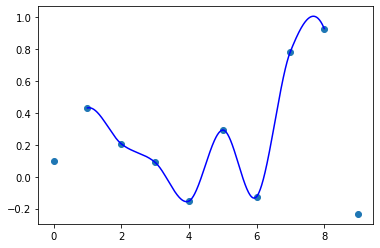

In [24]:
import numpy.linalg as npla

transformed_catmullrom_points_and_back = transformed_catmullrom_points.dot(npla.inv(transform_matrix))

# Let's check if it is indeed the same as if without the transforms
assert np.allclose(transformed_catmullrom_points_and_back, catmullrom_points)

# Visualization
plt.plot(transformed_catmullrom_points_and_back[:, 0], transformed_catmullrom_points_and_back[:, 1], 'b')
plt.scatter(control_points[:, 0], control_points[:, 1])

Prove why Catmull-Rom splines are basis independent (hint: don't overthink). You can type your explanation/equations or upload the solution as an image.

**<font color='orange'> \*\*Write your answer here (3 pt)\*\* </font>**
Since we're essentially just doing 2 dot products, 1 of the original transform and one of the inverse of that transform, it should cancel out. The dot product of some matrix and its inverse is just the identity matrix.

## 6.2. C2 interpolating curves
Implement a C2-interpolating curve and visualize it. 

**<font color='orange'> \*\*Write your code below (3 pts)\*\* </font>**

In [25]:
def c2_interpolation_of_points(control_points):
  """Sample a series of points using provided control points with C2-interpolating
  curve. Each segment (i.e. pair of consecutive control points) should generate
  101 sample points that are equally spaced time-wise. 
  
  Args:
    control_points: The positions of the control points. Shape is (len(control_points), 2)
  Returns:
    The interpolated points as a numpy array. The shape should be (101 * (len(control_points) - 1), 2)
  """
  interpolated_points = []
  time_array = np.linspace(0.0, 1.0, 101)
  M = np.zeros((len(control_points), len(control_points)))
  np.fill_diagonal(M, 4)
  M[0][0] = 2
  M[len(M)-1][len(M)-1] = 2
  for i in range(len(M)):
    for j in range(len(M)):
      if i + 1 == j or j + 1 == i:
        M[i][j] = 1
  C = []
  for i in range(len(control_points)):
    if i == 0:
      #print(i, "if")
      curr = np.subtract(control_points[i+1] , control_points[i])
    elif i == len(control_points)-1:
      #print(i, "elif")
      curr = np.subtract(control_points[i] , control_points[i-1])
    else:
      #print(i, "else")
      curr = np.subtract(control_points[i+1] , control_points[i-1])
    #print(curr)
    C += [np.dot(3, curr)]
  
  C = np.array(C)
  #print(C.shape, M.shape)
  #print(M)
  #print(np.subtract(control_points[9], control_points[7]))
  S = np.linalg.solve(M, C)
  #print(S)
  #print(C)
  index = 0
  for p0, p1 in zip(control_points[:-1], control_points[1:]):
    #print(p0)
    points = [bezier_segment_interpolation_at_t(p0, np.add(p0, np.dot(1/3,S[index])), np.subtract(p1, np.dot(1/3,S[index+1])), p1, t) for t in time_array]
    interpolated_points += points
    index += 1
  #print(np.array(interpolated_points))
  return np.array(interpolated_points)

Again, we provide a unit test for you.

In [26]:
unit_test_fn(c2_interpolation_of_points)

√ Unit test passed for c2_interpolation_of_points. :D


## 6.3. Animation
Splines are often used for describing animations of characters. Using your favorite spline, generate an interesting gesture (e.g., dance, hello, ...) of a X-arm manipulation robot. Skeleton codes will be given.

In [27]:
%%time
!apt-get install -y xvfb python-opengl ffmpeg
!pip install pybullet==2.6.5
!pip install ffmpeg-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,281 kB of archives.
After this operation, 7,687 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.11 [785 kB]
Fetched 1,281 kB in 1s (1,357 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 155569 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpack

**<font color='orange'> \*\*Write your code below (4 pts)\*\* </font>**


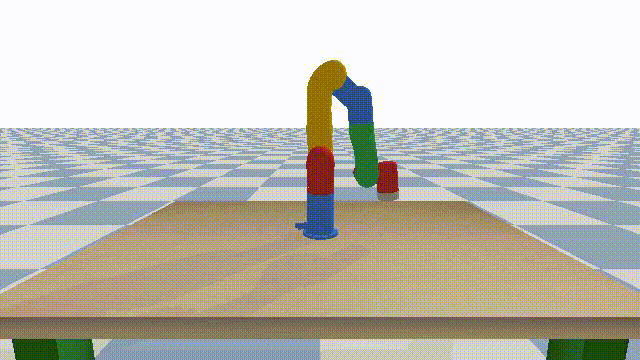

In [70]:
import pybullet as p
import pybullet_data as pd
import numpy as np
import random
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

import cv2
from PIL import Image
import ffmpeg

# Initialize PyBullet 
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pd.getDataPath())

p.resetSimulation()
useFixedBase = True
flags = p.URDF_INITIALIZE_SAT_FEATURES

plane = p.loadURDF("plane.urdf", [0, 0, -0.625], flags = flags, useFixedBase=True)
table = p.loadURDF("table/table.urdf", [0, 0, -0.625], flags = flags, useFixedBase=True)
xarm = p.loadURDF("xarm/xarm6_robot.urdf", flags = flags, useFixedBase=True)
num_xarm_joints = p.getNumJoints(xarm)
num_frames = 100
current_frame_joint_rotations = np.zeros((num_xarm_joints,))
joint_history = np.zeros((num_frames, num_xarm_joints))
for j in range(num_xarm_joints):
    p.resetJointState(xarm, j, 0.)

def set_joint_state(linkIndex, targetValue):
    current_frame_joint_rotations[linkIndex] = targetValue
    p.resetJointState(xarm, linkIndex, targetValue)

# Initialize Camera
pixelWidth = 640
pixelHeight = 360
viewMatrix = p.computeViewMatrixFromYawPitchRoll(cameraTargetPosition=[0,0,0.2], 
                                                 distance=1.1, 
                                                 yaw=0.0, 
                                                 pitch=-10.0, 
                                                 roll=0.0, 
                                                 upAxisIndex=2)
projectionMatrix = p.computeProjectionMatrixFOV(fov=60, 
                                                aspect=pixelWidth / pixelHeight, 
                                                nearVal=0.01, 
                                                farVal=100)


# Main loop that renders 100 frames
for t in range(num_frames):
  # This code sets the robot's joint angles for each frame.
  for j in range(num_xarm_joints):
    # (TODO) Edit here to describe your own animation.
    # j is the joint index
    # i * 0.01 is the joint angle, which is current set to a manual function f(t) = 0.01 * t. Please replace this with your spline.
    jointAngle = current_frame_joint_rotations[j]
    if j==2:
      #0-9, 20-29, 
      if t < 10 or (t >= 20 and t < 30) or (t >= 40 and t < 50) or (t >= 60 and t < 70) or (t >= 80 and t < 90):
        point = catmullrom_segment_interpolation_at_t(jointAngle, jointAngle-.03, jointAngle-.1, jointAngle-.15, t * .01)
      #10-19, 30-39
      else:
        point = catmullrom_segment_interpolation_at_t(jointAngle, jointAngle+.03, jointAngle+.1, jointAngle+.15, t * .01)
      set_joint_state(j, point)
    if j == 3:
      if t < 50:
        point = catmullrom_segment_interpolation_at_t(jointAngle, jointAngle-.070, jointAngle-.14, jointAngle-.21, t * .01)
      else:
        point = catmullrom_segment_interpolation_at_t(jointAngle, jointAngle+.04, jointAngle+.08, jointAngle+.12, t * .01)
      set_joint_state(j, point)
    #set_joint_state(j, t * 0.01 + j * 0.1)
    if j == 4:
      if t < 50:
        point = catmullrom_segment_interpolation_at_t(jointAngle, jointAngle+.01, jointAngle+.09, jointAngle+2, t * .01)
      else:
        point = catmullrom_segment_interpolation_at_t(jointAngle, jointAngle-.02, jointAngle-.08, jointAngle-2, t * .01)
      set_joint_state(j, point)

  # Record
  joint_history[t, :] = current_frame_joint_rotations
  # Render images
  _, _, img, _, _ = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix,projectionMatrix, shadow=1, lightDirection=[1,1,1])
  Image.fromarray(img[:, :, :3]).save('./frame%04d.jpg' % t)

def show_gif_image(filename):
  video = io.open(filename, 'r+b').read()
  encoded = base64.b64encode(video)
  ipythondisplay.display(HTML(data='''<img src="data:image/gif;base64,{0}"/>'''.format(encoded.decode('ascii'))))

# Zip the animation in to gif
ffmpeg.input('./frame*.jpg', pattern_type='glob', framerate=20.0).output('./output.gif').overwrite_output().run()
show_gif_image('./output.gif')

Let's also plot the joint angle over time.

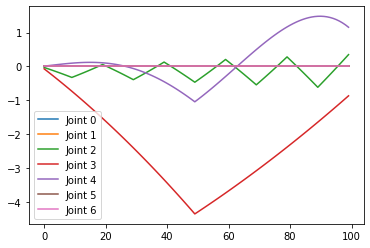

In [71]:
plt.plot(joint_history)
plt.legend(["Joint {}".format(i) for i in range(0, 7)])